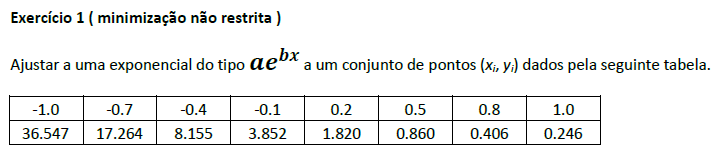

## Instalar pacote DEAP e importar o que for necessário

In [1]:
# https://deap.readthedocs.io/en/master/
!pip install deap

In [2]:
# Bibliotecas a serem utilizadas
import random
import numpy as np
import math
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

## Preparação para Otimização

1.   Função Objetivo
2.   Penalização
3.   Variáveis de Decisão
4.   Operadores



In [3]:
# Função Objetivo
def objective_function(individual):
  ''' 
  O melhor ajuste ocorrerá quando o erro y - a * exp (b * x) for minimizado
  a = individual[0] / b = individual[1]
  '''
  erro1 = abs(36.547 - (individual[0] * np.exp(individual[1]*(-1)))) 
  erro2 = abs(17.624 - (individual[0] * np.exp(individual[1]*(-.7))))
  erro3 = abs(8.155 - (individual[0] * np.exp(individual[1]*(-.4))))
  erro4 = abs(3.852 - (individual[0] * np.exp(individual[1]*(-.1))))
  erro5 = abs(1.820 - (individual[0] * np.exp(individual[1]*(0.2))))
  erro6 = abs(0.860 - (individual[0] * np.exp(individual[1]*(0.5))))
  erro7 = abs(0.406 - (individual[0] * np.exp(individual[1]*(0.8))))
  erro8 = abs(0.246 - (individual[0] * np.exp(individual[1]*(1))))
  return (erro1+erro2+erro3+erro4+erro5+erro6+erro7+erro8),

In [4]:
np.exp(10)

22026.465794806718

In [5]:
individual = [613.4947205021913, 906.8378860393268]
objective_function(individual)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


(inf,)

In [6]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))        # função objetivo: nome, tipo(f.o.), peso de cada objetivo (no caso só um objetivo)
creator.create("Individual", list,  fitness=creator.FitnessMin)   # indivíduo

In [7]:
toolbox = base.Toolbox()

# Gerador de atributos reais: nome, tipo das variáveis, intervalo (limites inferior e superior)
#toolbox.register("attr_int", random.randint, 0, 30000) # variáveis inteiras
toolbox.register("attr_real", random.uniform, -100, 100)

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_real, 2)   # 2: número de variáveis de decisão
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                  # lista de indivíduos

In [8]:
# Incializador de operadores
toolbox.register("evaluate", objective_function)                              # função objetivo
#toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta= 0.5, low= -100, up=100)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [9]:
pop = toolbox.population(n=100)                            # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

## Otimização

In [10]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=500, stats=stats, halloffame=hof)

gen	nevals	avg        	std        	min    	max        
0  	100   	2.96442e+41	2.26052e+42	293.314	2.22539e+43
1  	59    	1.44288e+36	1.43275e+37	127.373	1.43999e+38
2  	61    	1.4203e+32 	1.41318e+33	127.373	1.4203e+34 
3  	62    	6.38857e+09	6.35108e+10	127.373	6.38313e+11
4  	46    	10838.6    	67451.7    	127.373	656407     
5  	42    	400.415    	603.292    	95.8344	5728.12    
6  	53    	671.448    	4246.87    	35.6567	42873.8    
7  	56    	267.388    	395.227    	17.9167	2571.21    
8  	59    	120.611    	85.7001    	17.9167	563.981    
9  	61    	259.813    	1573.96    	17.9167	15729.6    
10 	60    	55.6932    	68.0969    	17.391 	614.875    
11 	67    	53.1339    	123.025    	12.6401	961.101    
12 	58    	47.9722    	189.567    	11.4667	1893.2     
13 	57    	19.7811    	20.7913    	11.2001	215.46     
14 	43    	15.8715    	2.74036    	11.2565	21.7434    
15 	62    	14.9819    	9.02622    	9.7921 	89.4347    
16 	48    	12.5152    	6.19766    	7.93987	72.7078    
17 	61    

## Resultados

In [11]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
objective_function(hof[0])

Melhor Indivíduo:
[3.5860271622317184, -2.3215541538086386]
Melhor Resultado da Função Objetivo:


(3.1383729757526466,)

###Gráfico da Evolução

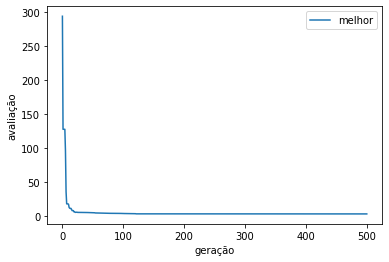

In [12]:
import matplotlib.pyplot as plt
gen, min, avg = log.select('gen', 'min', 'avg')
plt.plot(gen, min, label='melhor')
# plt.plot(gen, avg, label='média')
plt.ylabel('avaliação')
plt.xlabel('geração')
plt.legend();

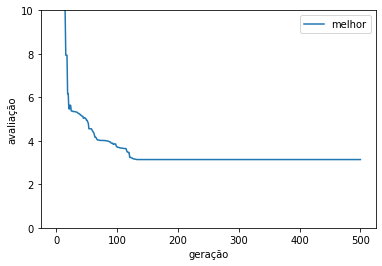

In [13]:
gen, min, avg = log.select('gen', 'min', 'avg')
plt.plot(gen, min, label='melhor')
# plt.plot(gen, avg, label='média')
plt.ylabel('avaliação')
plt.xlabel('geração')
plt.ylim((0,10))
plt.legend();


###Analisando o resultado

In [14]:
x = np.array([-1, -.7, -.4, -.1, 0.2, 0.5, 0.8, 1])
y = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])

In [15]:
def print_function(array_x, array_y):
  for x,y in zip(array_x, array_y):
    print('Valor real: {}, Valor aproximado: {}, Diferença: {}'.format(y, hof[0][0]*np.exp(hof[0][1]*(x)), abs(y - hof[0][0]*np.exp(hof[0][1]*(x)))))

In [16]:
print_function(x, y)

Valor real: 36.547, Valor aproximado: 36.547000000000025, Diferença: 2.842170943040401e-14
Valor real: 17.264, Valor aproximado: 18.21294959604267, Diferença: 0.9489495960426702
Valor real: 8.155, Valor aproximado: 9.076299914849118, Diferença: 0.9212999148491186
Valor real: 3.852, Valor aproximado: 4.523112509035305, Diferença: 0.671112509035305
Valor real: 1.82, Valor aproximado: 2.254062444093634, Diferença: 0.43406244409363404
Valor real: 0.86, Valor aproximado: 1.1232967324434313, Diferença: 0.2632967324434313
Valor real: 0.406, Valor aproximado: 0.5597873086543801, Diferença: 0.15378730865438006
Valor real: 0.246, Valor aproximado: 0.3518644706340784, Diferença: 0.10586447063407839
